# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,jaccard_score,f1_score,log_loss

# Load data

In [3]:
# Read data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Shuffle the entire data set (applies to both train & test)
df = df.sample(frac=1).reset_index(drop=True)
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [6]:
print(x[:3])

[[ 4.64850000e+04 -8.44335361e-01  1.05386162e+00  1.31958323e+00
  -1.43822763e+00 -2.70653223e-01 -7.91527642e-01  4.34779097e-01
   1.02640086e-01  1.61216873e-01  1.12784070e-01  1.35331379e+00
   9.18634927e-01  3.27997507e-01 -1.08520064e-01 -2.00948729e-01
   7.84600883e-01 -9.85561134e-01  4.01236058e-02 -5.33936944e-01
   3.00849547e-01 -1.10371317e-01 -1.56085801e-01 -2.16231242e-02
   3.73274644e-01 -1.67799319e-01  7.13212191e-01  3.85636905e-01
   1.77912150e-01  7.70000000e-01]
 [ 6.96800000e+04  1.17471366e+00 -5.85910317e-01  9.20571199e-01
   2.07378693e-01 -1.20385640e+00 -2.08913653e-01 -7.31949946e-01
   1.64346404e-01  1.48027007e+00 -4.16917729e-01 -1.40068388e+00
  -4.32983456e-01 -1.63331888e+00 -2.36267335e-01 -8.86800336e-02
   6.72739246e-02  1.10796994e-01 -3.09958831e-01  6.02333298e-01
  -1.09285101e-01 -2.57729192e-01 -6.32757936e-01  2.84693072e-02
   6.77898679e-02  1.16051082e-01  9.66692750e-01 -5.11062159e-02
   1.26564682e-02  4.00000000e+01]
 [ 9.8

In [7]:
print(y[:3])

[0 0 0]


# Finding the best k for KNN

In [8]:
def optimalK():
    Ks = 30
    mean_acc = np.zeros((Ks - 1))
    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
        y_pred = neigh.predict(x_test)
        mean_acc[n - 1] = accuracy_score(y_test, y_pred)
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
    return mean_acc.argmax()+1

# Creating train and test data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

# creating scaler object for encoding
scaler = StandardScaler()
# applying StandardScaler on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
metric = np.array([['Accuracy Score','Jaccard Score','F1-score','Log Loss'],['','','',''],['','','',''],['','','','']])

# Logistic Regression

In [13]:
classifier = LogisticRegression(C=0.1, solver='saga',max_iter=1500,random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
metric[0,:] = np.array([['{:.2%}'.format(accuracy_score(y_test, y_pred)),'{:.2%}'.format(jaccard_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred)),log_loss(y_test, y_pred)]])

# Decision Tree

In [14]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=4, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
metric[1,:] = np.array([['{:.2%}'.format(accuracy_score(y_test, y_pred)),'{:.2%}'.format(jaccard_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred)),'NA']])

# SVM Regression

In [15]:
classifier = SVC(kernel='rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
metric[2,:] = np.array([['{:.2%}'.format(accuracy_score(y_test, y_pred)),'{:.2%}'.format(jaccard_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred)),'NA']])

# KNN

In [16]:
classifier = KNeighborsClassifier(n_neighbors=optimalK())
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
metric[3,:] = np.array([['{:.2%}'.format(accuracy_score(y_test, y_pred)),'{:.2%}'.format(jaccard_score(y_test, y_pred)),
                            '{:.2%}'.format(f1_score(y_test, y_pred)),'NA']])  

The best accuracy was with 0.9996664442961974 with k= 3


# Accuracy 

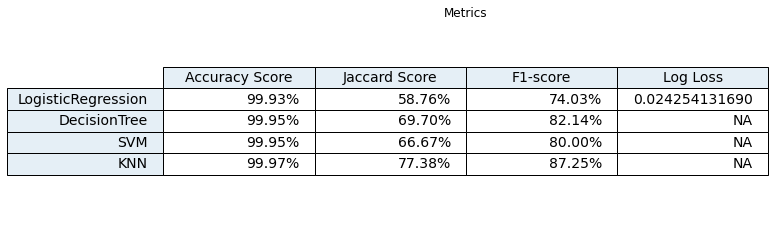

In [17]:
# plot metric
columns = ('Accuracy Score','Jaccard Score','F1-score','Log Loss')
rows = ('LogisticRegression', 'DecisionTree', 'SVM','KNN')
rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(columns), 0.1))
table = plt.table(cellText=metric,rowLabels=rows,rowColours=rcolors,rowLoc='right',colColours=ccolors,colLabels=columns,loc='center')
table.set_fontsize(31)
table.scale(2, 2)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Metrics')
plt.show()
